# **Predicting Term Deposits Subscription: A Classification & Segmentation Approach for Bank Telemarketing Campaigns**

# Problem Statement:

A bank conducted a telemarketing campaign for one of its financial products called ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts with the bank.

What is the term Deposit?

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.


# Business Objective:

**This project implements the machine learning binary classification to predict if the customer will take/** **subscribe a bank term deposit (variable y) by analyzing various customers dimensions. Build a model for Data-Driven Approach to Predict the Success of Bank Telemarketing**


# Import Libraries

In [1]:
import pandas as pd 
import numpy as np  
import sidetable
import sklearn
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
from pathlib import Path
from glob import glob

# Display Settings

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore')

# Data Ingestion & Basic Understanding

In [3]:
path = Path.cwd().parent
path_data = path/'data'/'raw'
files = []
for file in path_data.glob('*'):
    files.append(file)

files

[WindowsPath('e:/Bank-Telemarketing/data/raw/.gitkeep'),
 WindowsPath('e:/Bank-Telemarketing/data/raw/bank-additional-full.csv'),
 WindowsPath('e:/Bank-Telemarketing/data/raw/bank-additional-names.txt'),
 WindowsPath('e:/Bank-Telemarketing/data/raw/bank-full.csv'),
 WindowsPath('e:/Bank-Telemarketing/data/raw/info.txt')]

In [4]:
f = open(path_data/'bank-additional-names.txt','rt')
for line in f.readlines():
    print(line.strip())

Citation Request:
This dataset is publicly available for research. The details are described in [Moro et al., 2014].
Please include this citation if you plan to use this database:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
[bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014

3. Past Usage:

The full dataset (bank-additional-full.csv) was described and analyzed in:

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

4. Relevant Information:

This dataset is based on "Bank Marketing" UC

In [5]:
data = pd.read_csv(path/'data'/'raw'/'bank-additional-full.csv', sep=';')
data.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [6]:
data.tail(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,no


In [7]:
data.sample()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
371,37,blue-collar,married,basic.9y,no,no,yes,telephone,may,tue,54,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [8]:
data.shape
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])

Number of rows: 41188
Number of columns: 21


In [9]:
# Remove whitespace from column names
data.columns = data.columns.str.strip()
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The data is collected by Banco de Portugal via direct phone call marketing campaigns but duration of call is not included, where 20 columns are recorded for 41188 term deposit market campaign.

**Bank Client Data Description:**

- **age**: Age of the client (numeric)
- **job**: Type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- **marital**: Marital status (categorical: 'divorced', 'married', 'single', 'unknown')
- **education**: Level of education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- **default**: Whether the client has credit in default (binary: 'no', 'yes', 'unknown')
- **housing**: Whether the client has a housing loan (binary: 'no', 'yes', 'unknown')
- **loan**: Whether the client has a personal loan (binary: 'no', 'yes', 'unknown')

**Last Contact Data Description:**

- **contact**: Type of communication used to contact the client (categorical: 'cellular', 'telephone')
- **month**: Last contact month of the year (categorical: 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec')
- **day_of_week**: Last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- **duration**: Duration of the last contact in seconds (numeric)
Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

**Campaign Data Description:**

- **campaign**: Number of contacts performed during this campaign for this client (numeric, includes last contact)
- **pdays**: Number of days since the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous**: Number of contacts performed before this campaign for this client (numeric) 
- **poutcome**: Outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

**Social and Economic Context Data Description:**

- **emp.var.rate**: Employment variation rate - quarterly indicator (numeric)
- **cons.price.idx**: Consumer price index - monthly indicator (numeric)
- **cons.conf.idx**: Consumer confidence index - monthly indicator(numeric)
- **euribor3m**: Euribor 3-month rate - daily indicator(numeric)
- **nr.employed**: Number of employees - quarterly indicator(numeric)

**Target Variable:**
- **y**: Whether the client subscribed to a term deposit (binary: 'no', 'yes')



**This dataset represents the direct marketing campaign(phone calls) of a Portuguese banking institution, where each record represents a client and the outcome of a marketing campaign to convince the client to subscribe a term deposit. The dataset contains both categorical and numerical features describing each client's demographics, behaviroal, social and economic context, with a binary target variable indicating whether the client subscribed to a term deposit. The data spans from May 2008 to November 2010**

**Missing Attribute Values**: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.


# Formatting and Consistency Checks

In [11]:
pd.DataFrame({
    'dtype':data.dtypes,
    'nunique': data.nunique(),
    'unique': [data[col].unique() for col in data.columns]},
    index=data.columns)

,dtype,nunique,unique
age,int64,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
job,object,12,"[housemaid, services, admin., blue-collar, tec..."
marital,object,4,"[married, single, divorced, unknown]"
education,object,8,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
default,object,3,"[no, unknown, yes]"
housing,object,3,"[no, yes, unknown]"
loan,object,3,"[no, yes, unknown]"
contact,object,2,"[telephone, cellular]"
month,object,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
day_of_week,object,5,"[mon, tue, wed, thu, fri]"


In [12]:
def highlight_zero_negative(val):
    if val < 0:
        return 'background-color: red; color: white;'  # Negative values styled in red
    elif val == 0:
        return 'background-color: yellow; color: black;'  # Zero values styled in yellow
    else:
        return ''  # No styling for positive values

In [13]:
def highlight_repeats(series):
    is_repeat = series.duplicated(keep=False)  # Identify repeated values
    return ['background-color: green; color: white' if repeat else '' for repeat in is_repeat]


In [14]:
# Formatting and data descripition for numerical columns 
df_descb = data.describe(include='number')
display(df_descb.style.applymap(highlight_zero_negative))
df_descb.style.apply(highlight_repeats)#, subset=df_descb.columns)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**NOTEs:**

- **Duration**: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- **pdays** : 999 means client was not previously contacted


In [15]:
data[data['duration'].isin([0])]['term_deposit']

KeyError: 'term_deposit'

In [ ]:
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
# Categorical columns Consistency Check

def calculate_category_cols_info(df:pd.DataFrame):
    #Store data in dictionary
    value_dict = {}
    pct_dict = {}

    # Get categorical columns
    cat_cols = df.select_dtypes(include=['object']).columns

    # Iterate through each categorical column
    for col in cat_cols:
        count = df[col].value_counts()
        pct = df[col].value_counts(normalize=True) * 100
        value_dict[col] = count.to_dict()
        pct_dict[col] = pct.to_dict()

    # Convert dictionary of dictionaries to DataFrames
    count_df = pd.DataFrame.from_dict(value_dict, orient='index').stack().reset_index()
    count_df.columns = ['Features', 'Category', 'Count']
    pct_df = pd.DataFrame.from_dict(pct_dict, orient='index').stack().reset_index()
    pct_df.columns = ['Features', 'Category', 'Percentage']

    # Merge the two DataFrames on Features and Category
    result_df = pd.merge(count_df, pct_df, on=['Features', 'Category'])
    
    # Set MultiIndex for better readability
    result_df.set_index(['Features', 'Category'], inplace=True)

    return result_df

In [ ]:
# Define a function to highlight specific category
def highlight_category(val):
    return np.where(val=='unknown','background-color: lightgreen;',"")  # Highlight 'unknown' in light green


In [ ]:
cat_df = calculate_category_cols_info(data)
cat_df.style.apply_index(highlight_category)

In [ ]:
# Data Duplicates Check
data.duplicated().sum()

np.int64(12)

In [ ]:
data = data.drop_duplicates()
data.shape

(41176, 21)

# Univariate Analysis of Target Variable

In [ ]:
# Change name of target column(y)
data.rename(columns={'y': 'term_deposit'},inplace=True)

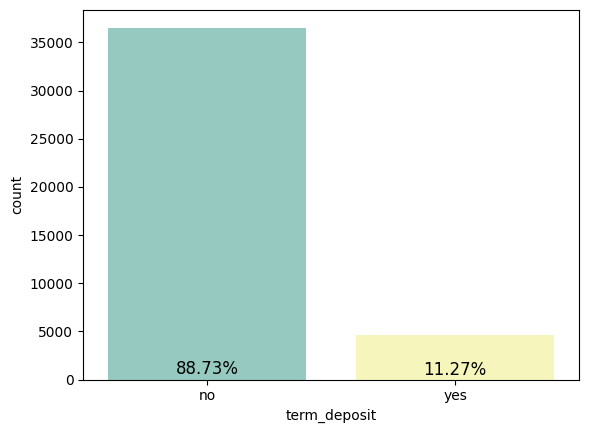

In [ ]:
sns.countplot(x=data['term_deposit'],palette='Set3')
for i, v in enumerate(round(data['term_deposit'].value_counts(normalize=True)*100,2)):
    plt.text(i,v+50,f'{v:.2f}%',ha='center', va= 'bottom',fontsize=12, color='black')
plt.show()

**Data is highly imbalanced, with a significant majority of customers not subscribing to the term deposit. This imbalance will need to be addressed in the modeling phase, possibly through techniques such as resampling or using algorithms that can handle class imbalance effectively.**